# Kaggle_Health_Insurance_Cost_Prediction

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
health = pd.read_excel('insurance_cleaned.xlsx')

### columns
* age
* sex
* bmi = body mass index
* children
* smoker
* region
* charges

### 1338 lines

In [5]:
health.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,children?
0,0,19,female,27.900,0,True,southwest,16884.92400,False
1,1,18,male,33.770,1,False,southeast,1725.55230,True
2,2,28,male,33.000,3,False,southeast,4449.46200,True
3,3,33,male,22.705,0,False,northwest,21984.47061,False
4,4,32,male,28.880,0,False,northwest,3866.85520,False


In [55]:
health['sex?'] = np.where((health['sex']=='female'),True,False)
health.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,children?,sex?
0,0,19,female,27.900,0,True,southwest,16884.92400,False,True
1,1,18,male,33.770,1,False,southeast,1725.55230,True,False
2,2,28,male,33.000,3,False,southeast,4449.46200,True,False
3,3,33,male,22.705,0,False,northwest,21984.47061,False,False
4,4,32,male,28.880,0,False,northwest,3866.85520,False,False


## First, let's look at the collection boxplot to get a better idea of the distribution of values.

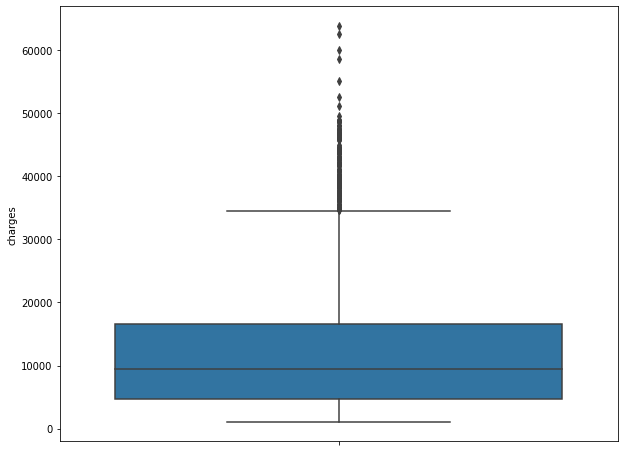

In [56]:
plt.figure(figsize=(10, 8))
sns.boxplot(y=health['charges'])
plt.show()

### The average is around 10k. There are many values above the fourth quartile that are not outliers. We have to understand what are the types of people / families that are part of this group.

In [57]:
q3 = health['charges'].quantile(0.75)
q3_health = health[(health['charges']>q3)]

q3_health.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,children?,sex?
0,0,19,female,27.900,0,True,southwest,16884.92400,False,True
3,3,33,male,22.705,0,False,northwest,21984.47061,False,False
9,9,60,female,25.840,0,False,northwest,28923.13692,False,True
11,11,62,female,26.290,0,True,southeast,27808.72510,False,True
14,14,27,male,42.130,0,True,southeast,39611.75770,False,False


In [31]:
print('We have {0} people who pay values above q3, that is, extremely high.'.format(q3_health.shape[0]))

We have 335 people who pay values above q3, that is, extremely high.


In [92]:
q3_health.groupby(['smoker']).agg({'charges':'count'})

,charges
smoker,
False,80
True,255


In [93]:
health.groupby(['smoker']).agg({'charges':'count'})

,charges
smoker,
False,1064
True,274


### We have much more smokers in this group than non-smokers.

### 93% of the smokers in the dataset are part of the group that pays higher prices.

## Let's look at the correlation heatmap for charges.

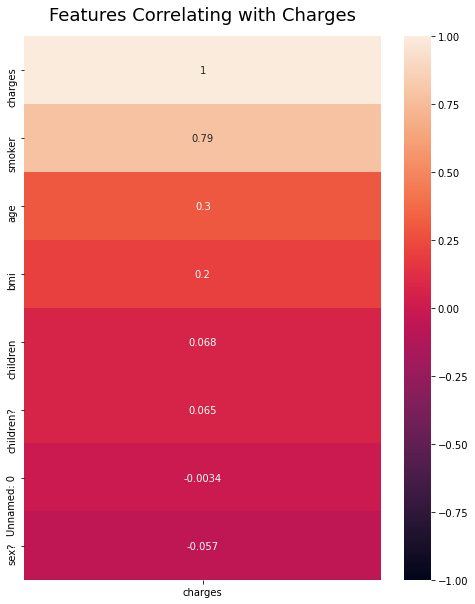

In [59]:
plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(health.corr()[['charges']].sort_values(by='charges', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Charges', fontdict={'fontsize':18}, pad=16)
plt.show()

### As expected, the smoking factor is one that most influences the value of charges.  After that, age is the most influential.

## 1. The `smoker` column
First, let's look at the smoker column.

In [60]:
health.pivot_table(index='smoker',aggfunc=np.mean)

,Unnamed: 0,age,bmi,charges,children,children?,sex?
smoker,,,,,,,
False,667.477444,39.385338,30.651795,8434.268298,1.090226,0.568609,0.514098
True,672.470803,38.514599,30.708449,32050.231832,1.113139,0.580292,0.419708


### The difference in charging a smoker and a non-smoker is very large. The other features, however, do not suffer a great difference in their averages.

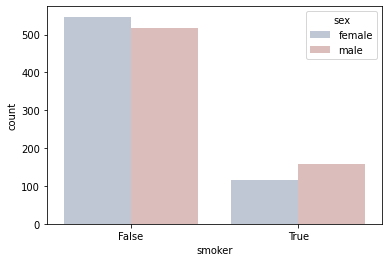

In [63]:
ax = sns.countplot(x="smoker", hue="sex", data=health,palette="vlag")

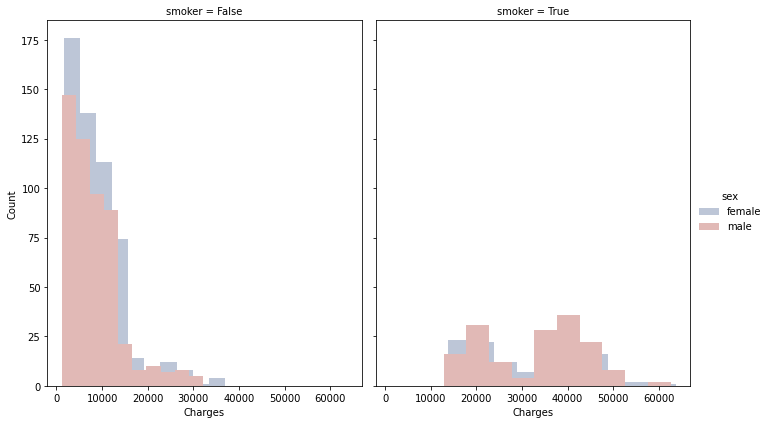

In [90]:
grid = sns.FacetGrid(health, col="smoker", hue='sex',palette="vlag", height=6, aspect=0.8,despine=False)
graph = grid.map(plt.hist, "charges",bins=10)
grid.set_axis_labels("Charges", "Count")
grid.add_legend()
plt.show()

### Smokers pay no less than 10k. On the other hand, there are many non-smokers who pay less than 10k.

## 2. The `age` column
Let's look at the age column.

In [94]:
health.pivot_table(index='age',aggfunc=np.mean)

,Unnamed: 0,bmi,charges,children,children?,sex?,smoker
age,,,,,,,
18,679.579710,31.326159,7086.217556,0.449275,0.260870,0.478261,0.173913
19,581.397059,28.596912,9747.909335,0.426471,0.264706,0.485294,0.264706
20,717.103448,30.632759,10159.697736,0.862069,0.413793,0.482759,0.310345
21,659.357143,28.185714,4730.464330,0.785714,0.428571,0.464286,0.071429
22,689.285714,31.087679,10012.932802,0.714286,0.357143,0.464286,0.214286
23,795.000000,31.454464,12419.820040,1.000000,0.535714,0.500000,0.250000
24,705.678571,29.142679,10648.015962,0.464286,0.178571,0.500000,0.214286
25,757.000000,29.693929,9838.365311,1.285714,0.571429,0.464286,0.178571
26,687.357143,29.428929,6133.825309,1.071429,0.642857,0.464286,0.107143
